In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

# show all columns
pd.options.display.max_columns = None

In [2]:
# if not os.path.exists('Outputs'):
#     os.makedirs('Outputs')
    
# outputs = ['.\\Outputs', "scratch.gdb", 'results.gdb']

In [3]:
# params
tdm_years = [2022, 2027, 2035, 2045]
years = [2020, 2030, 2040, 2050]
vars = ['TOTHH','HHPOP','TOTEMP','RETEMP','INDEMP','OTHEMP','ALLEMP','RETL',	
        'FOOD','MANU','WSLE','OFFI','GVED','HLTH','OTHR','FM_AGRI','FM_MING','FM_CONS','HBJ']

not_used = ['HHSIZE','AVGINCOME','Enrol_Elem','Enrol_Midl','Enrol_High','CO_FIPS','CO_NAME']

wfrc_only = True

In [4]:
# se folder paths
new_folder = r"..\new_se"
old_folder = r"..\old_se"

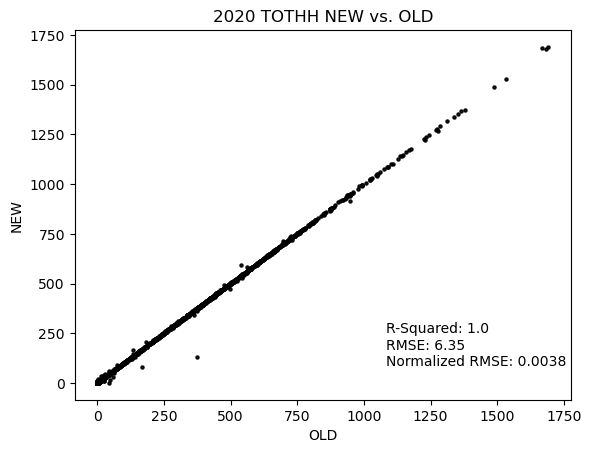

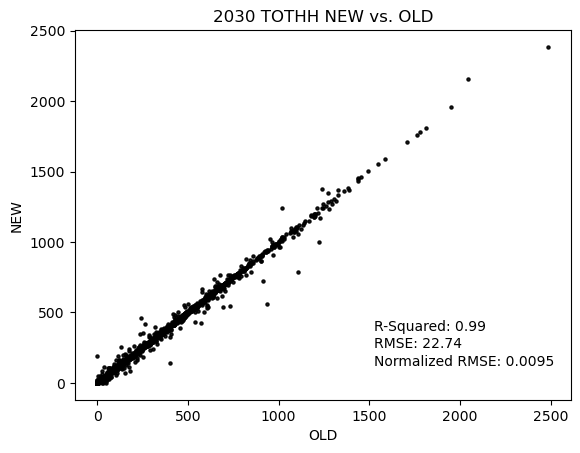

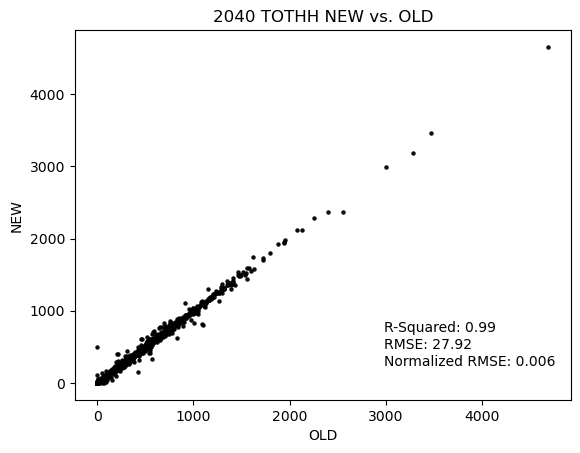

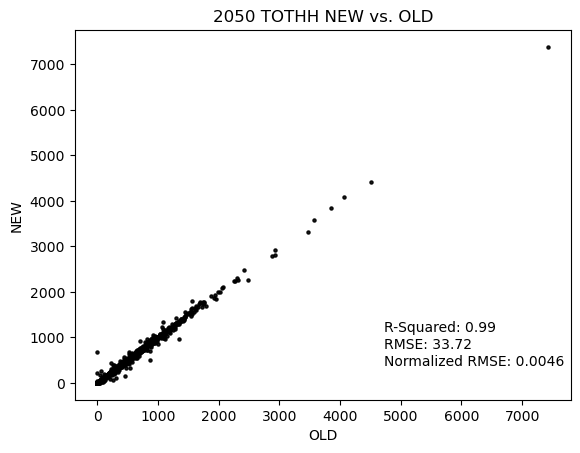

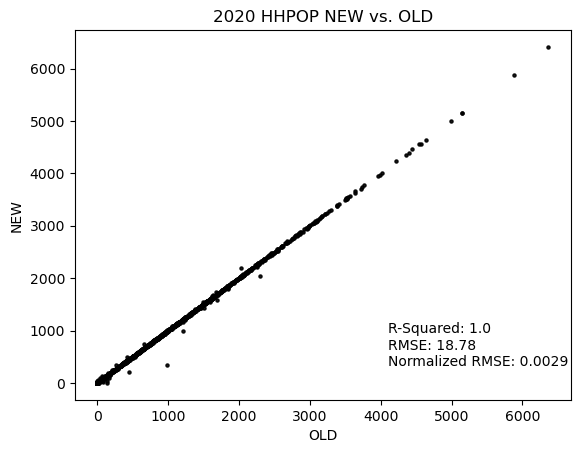

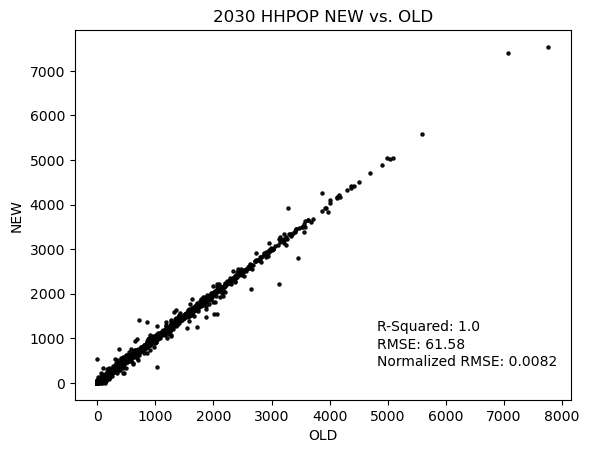

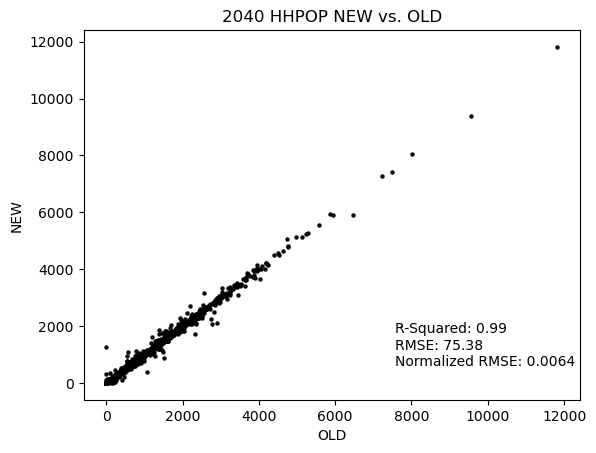

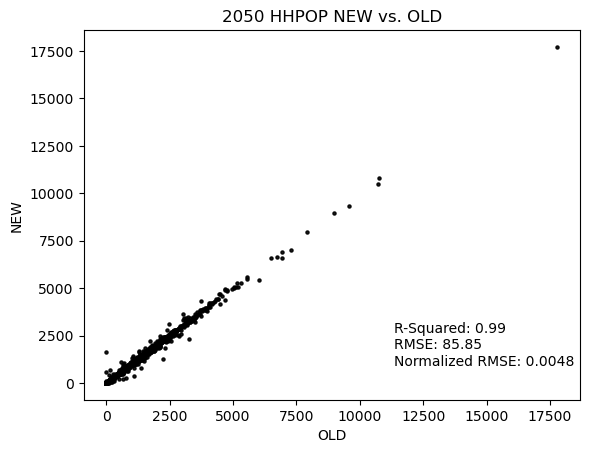

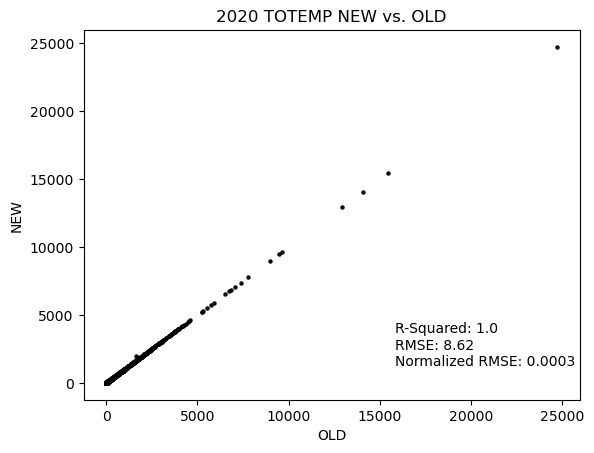

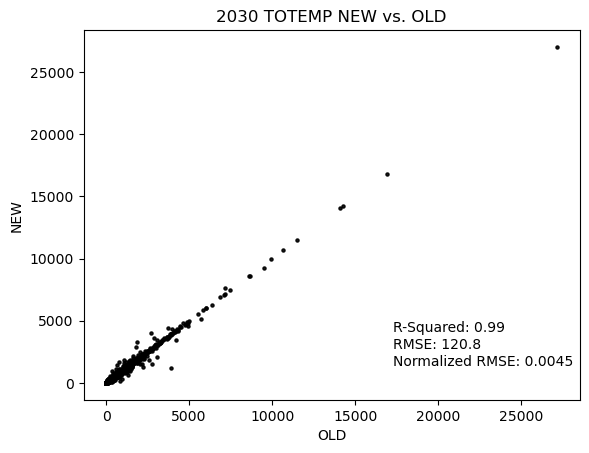

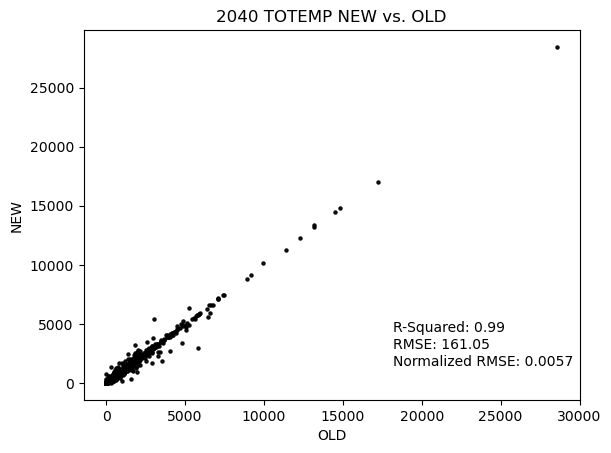

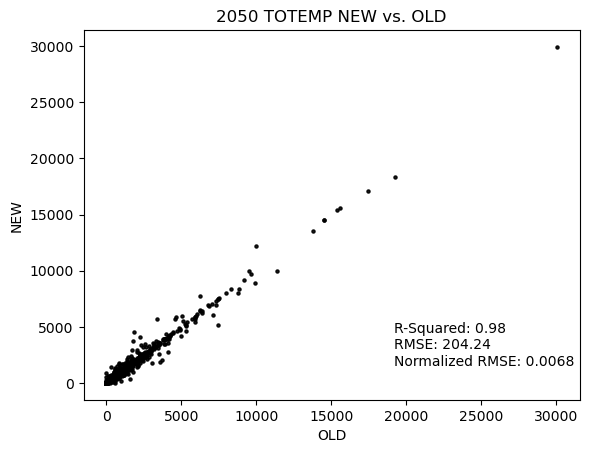

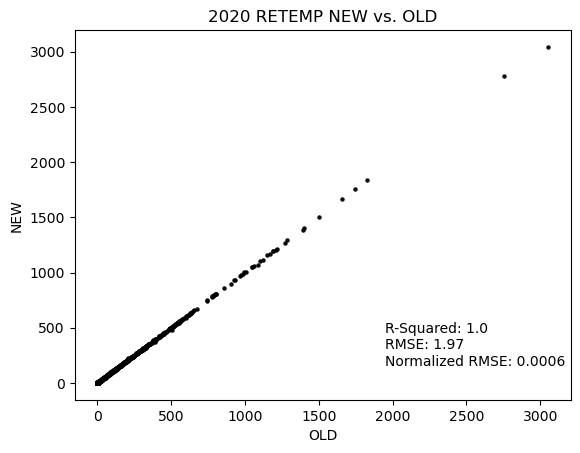

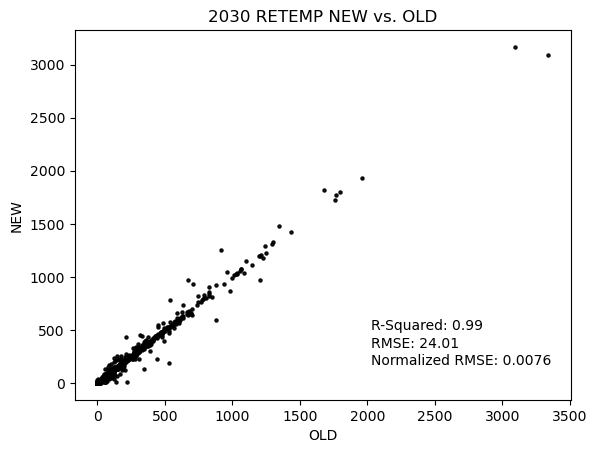

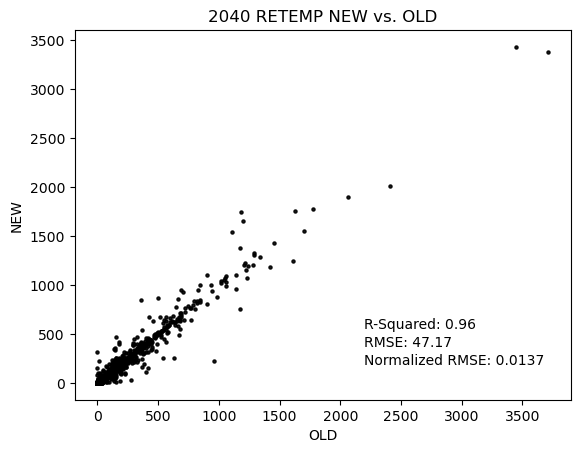

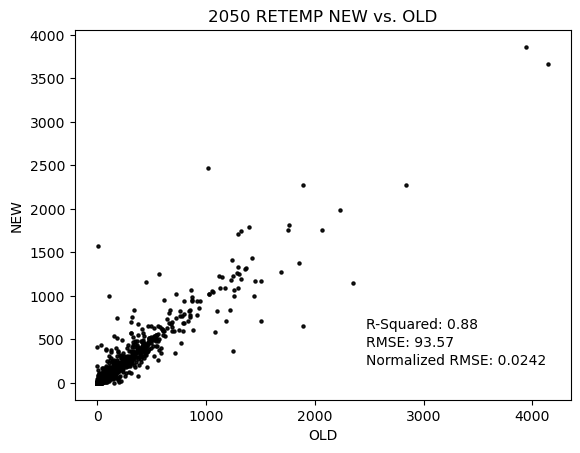

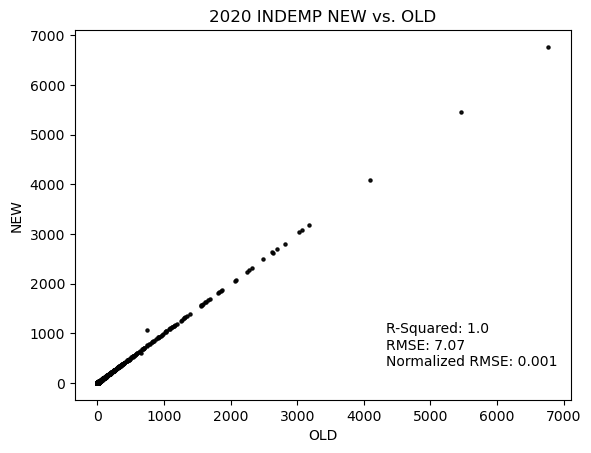

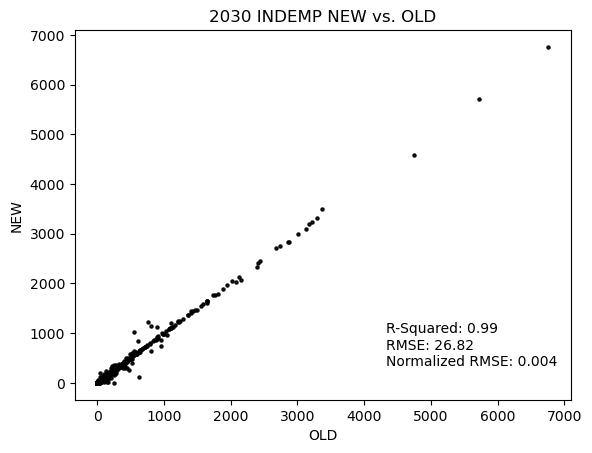

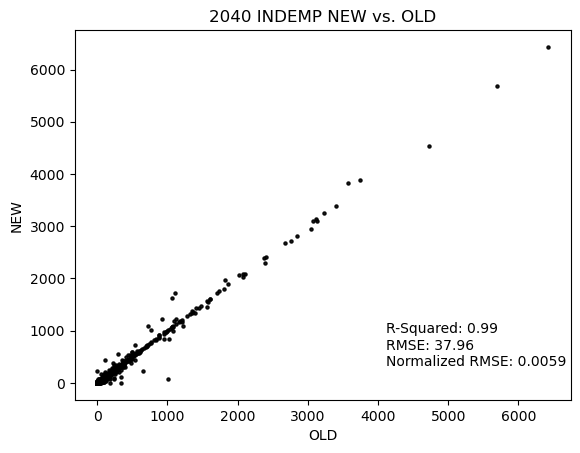

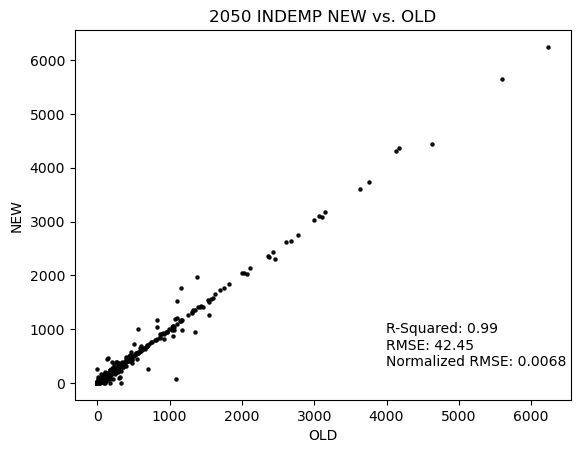

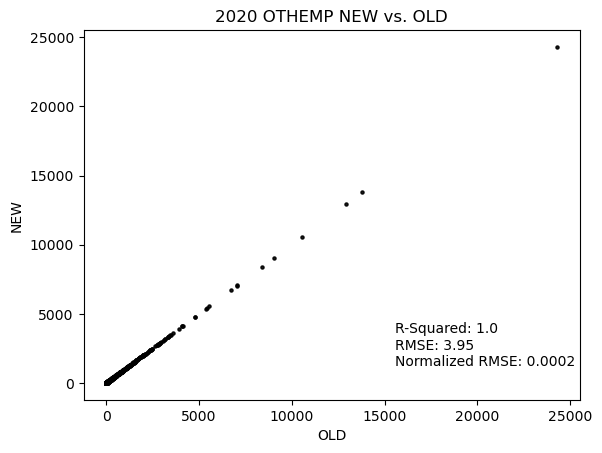

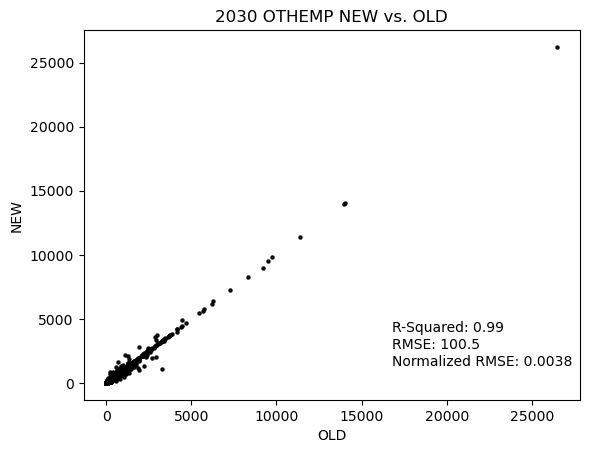

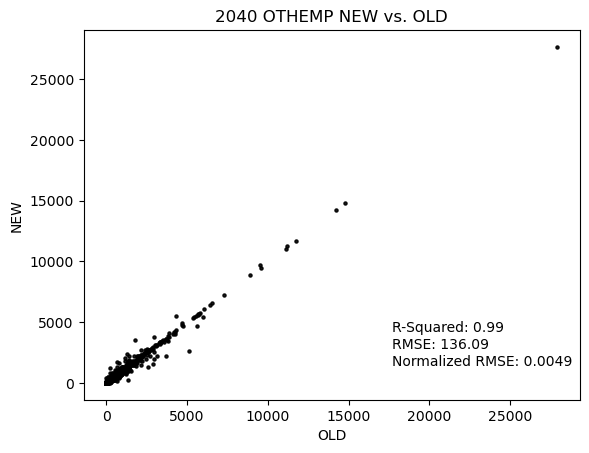

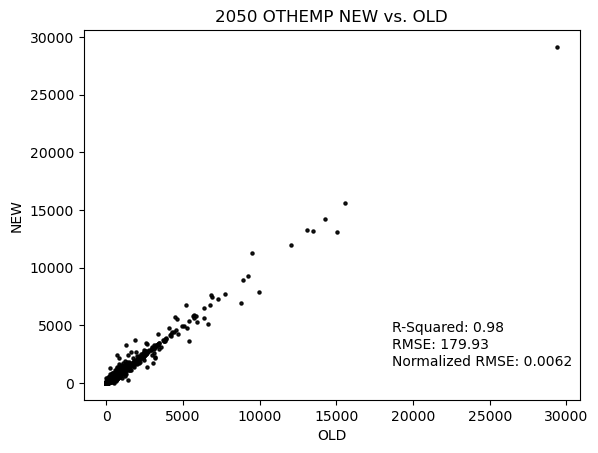

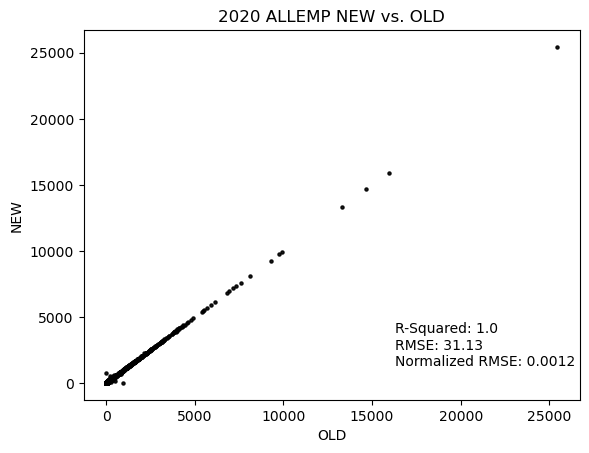

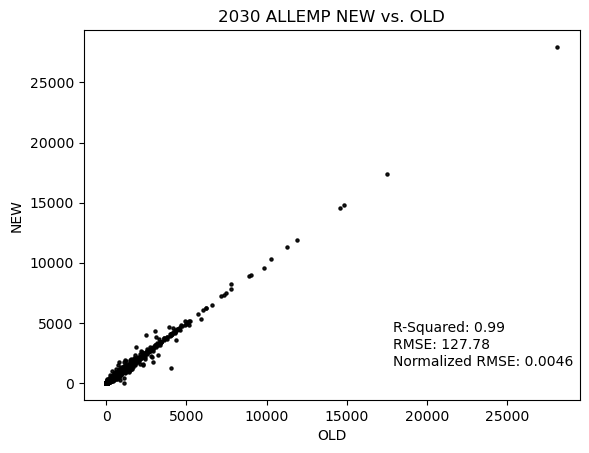

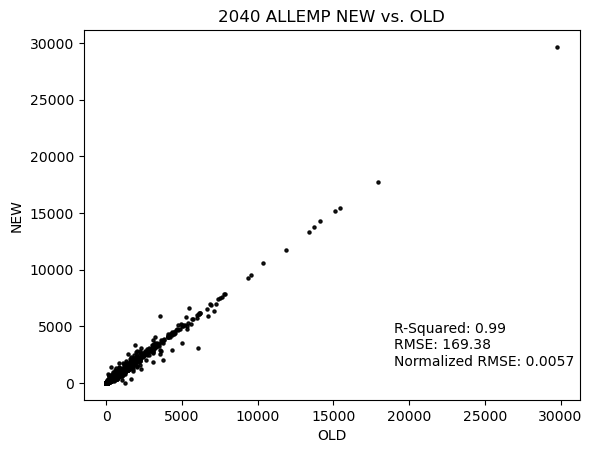

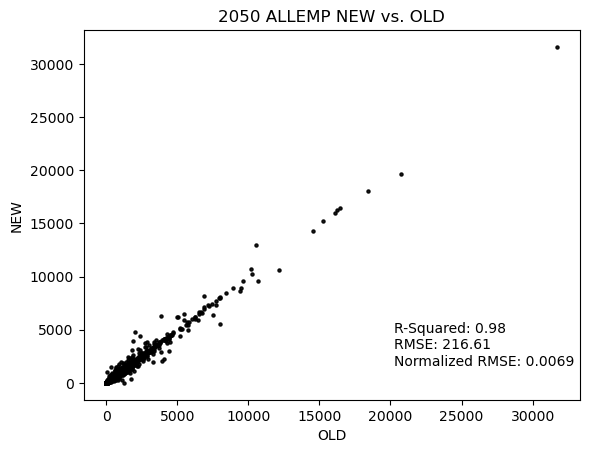

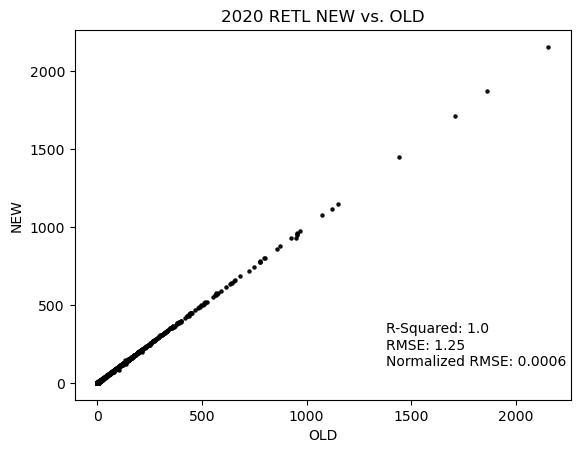

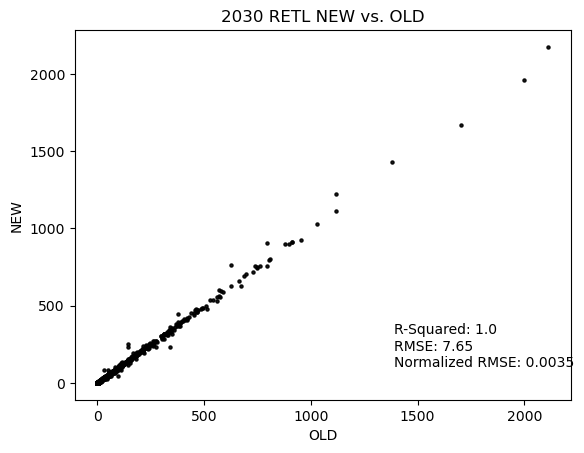

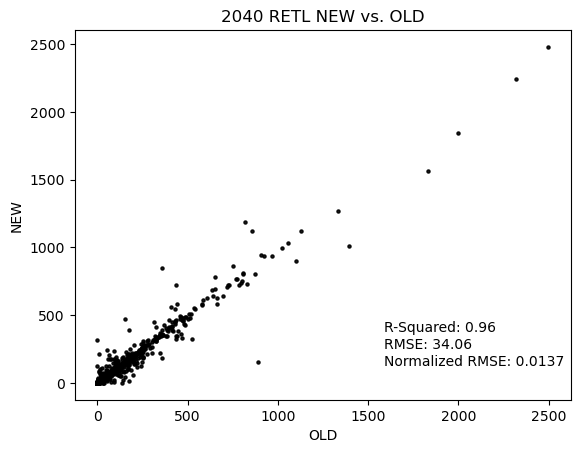

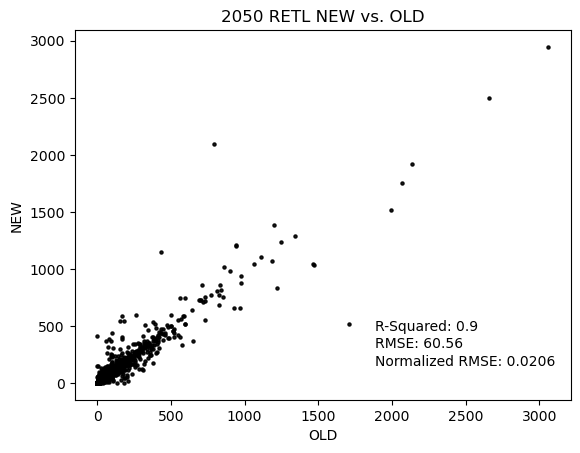

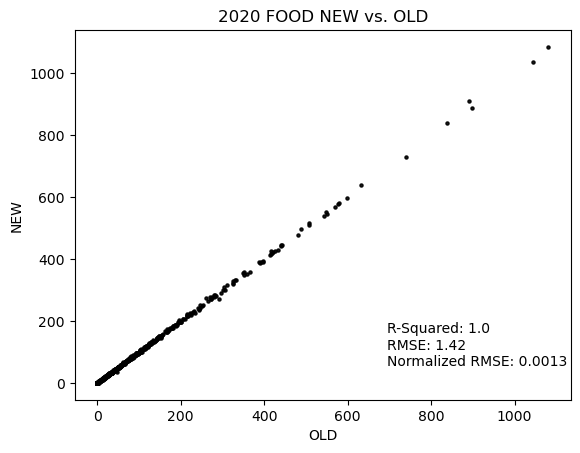

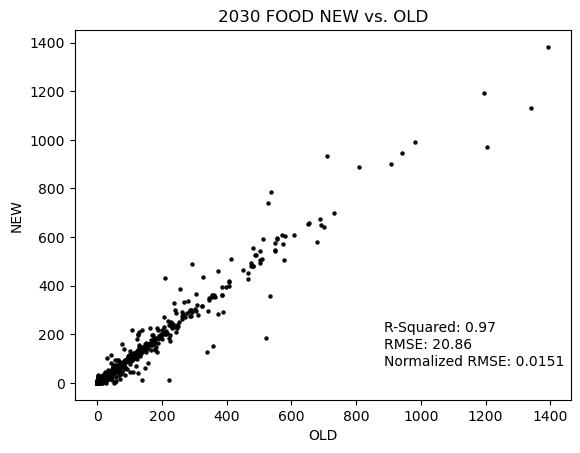

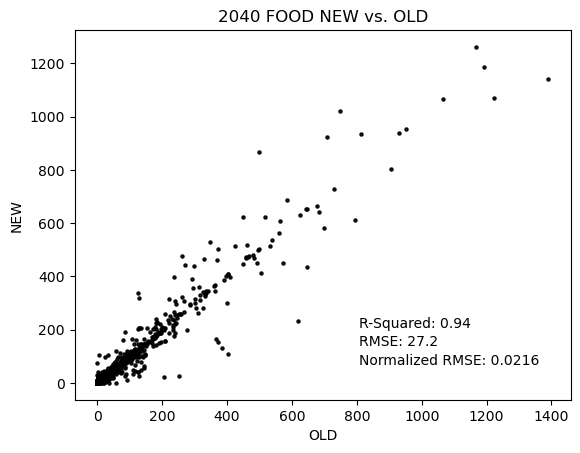

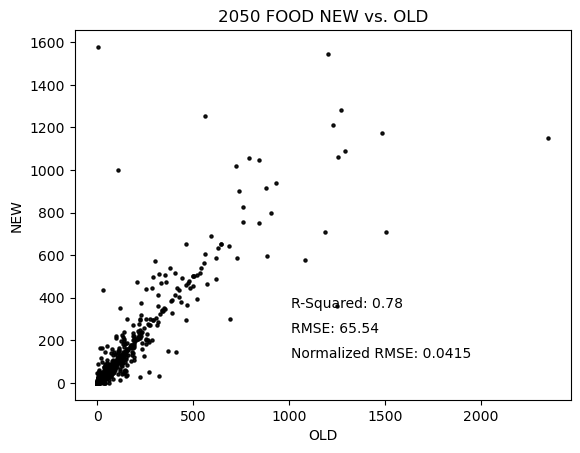

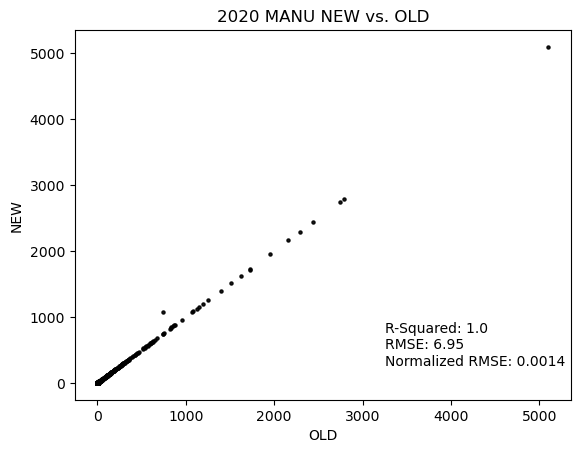

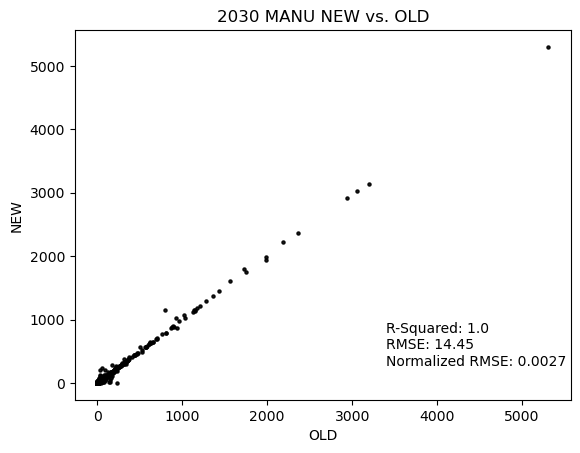

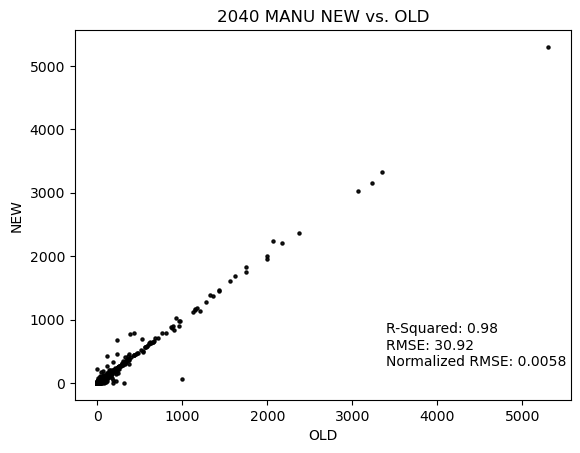

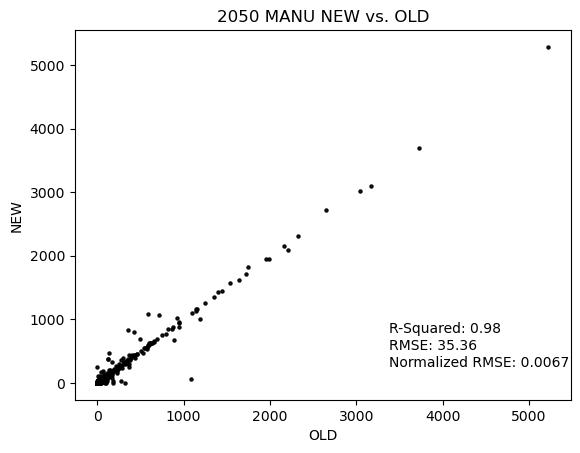

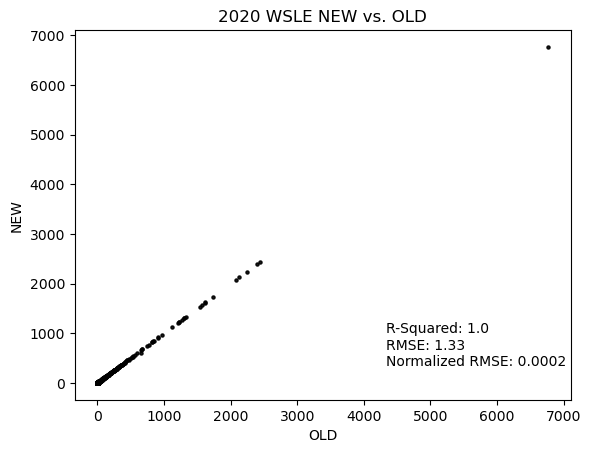

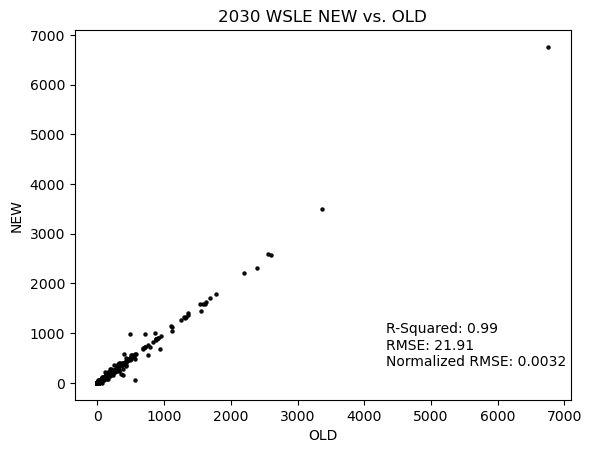

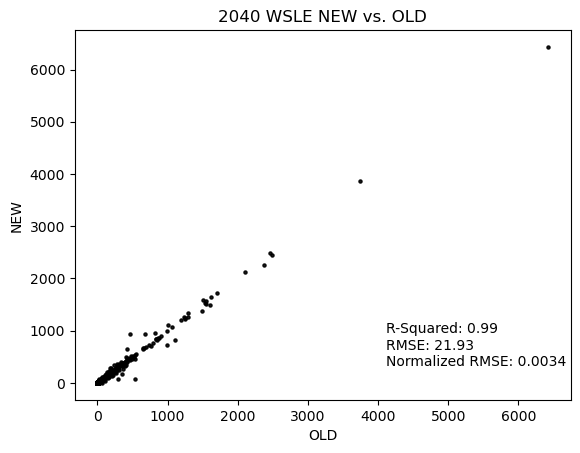

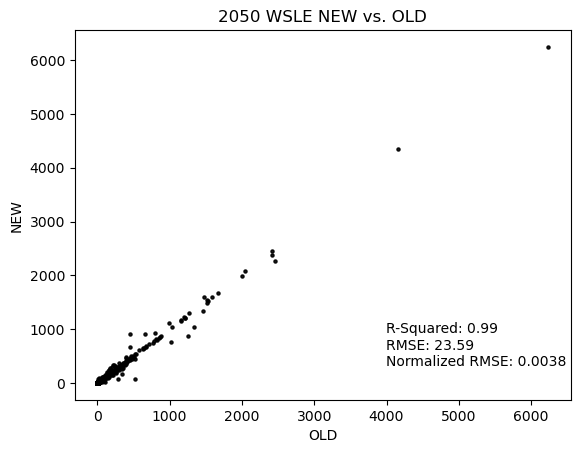

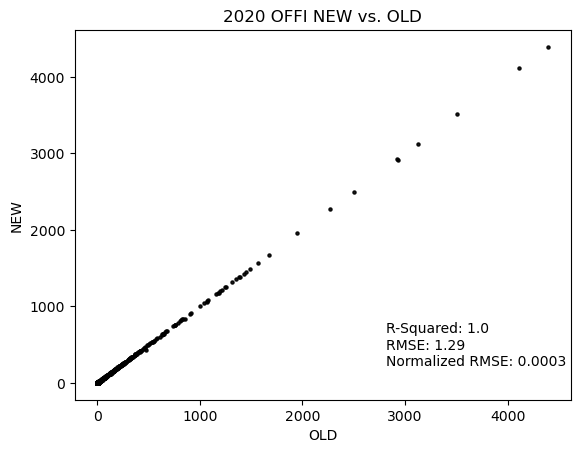

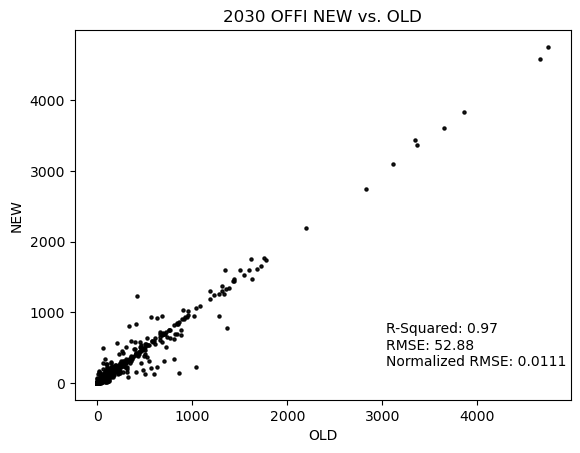

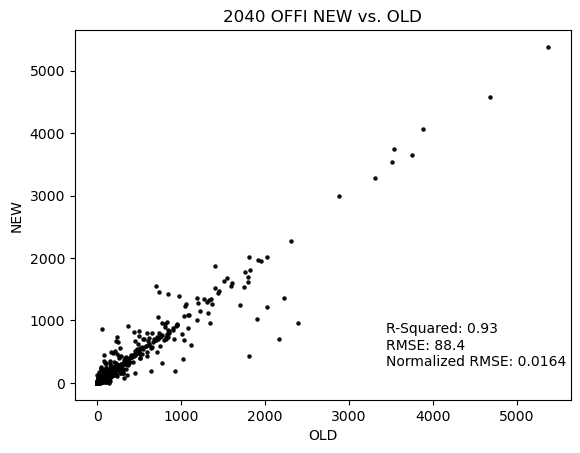

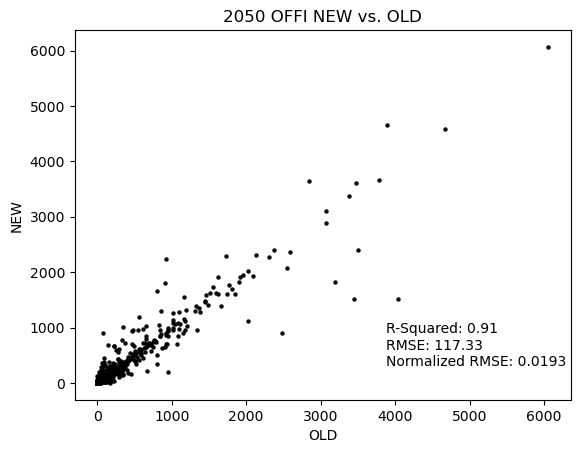

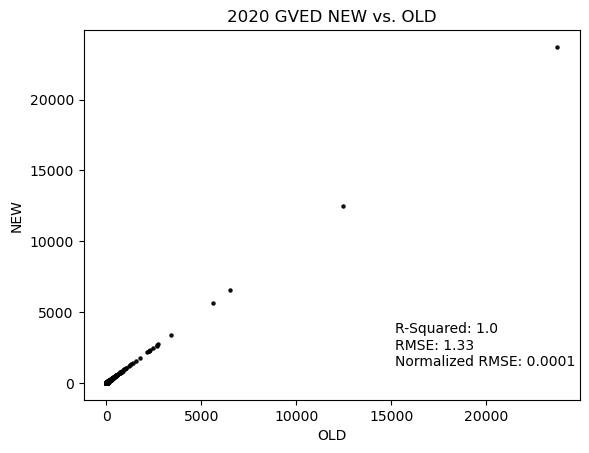

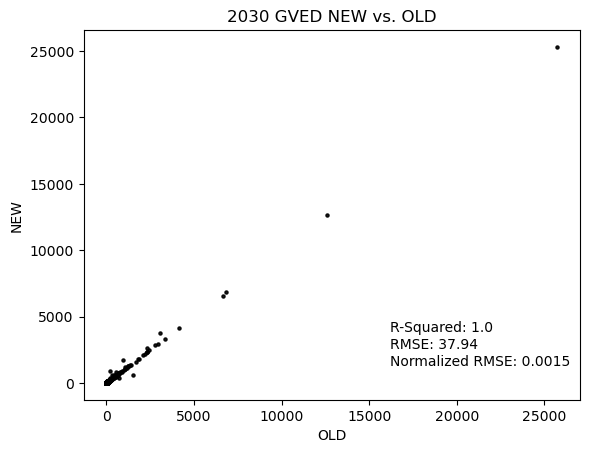

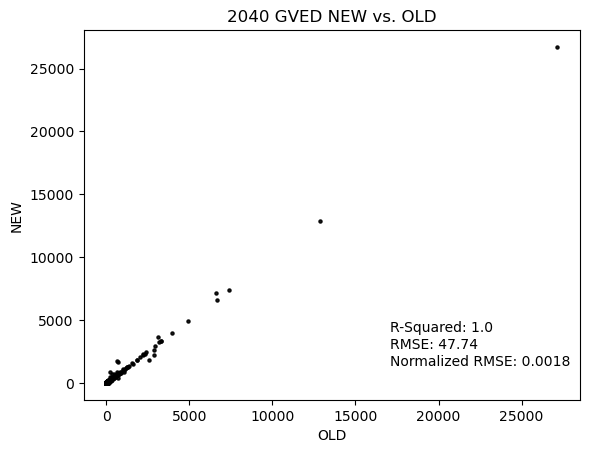

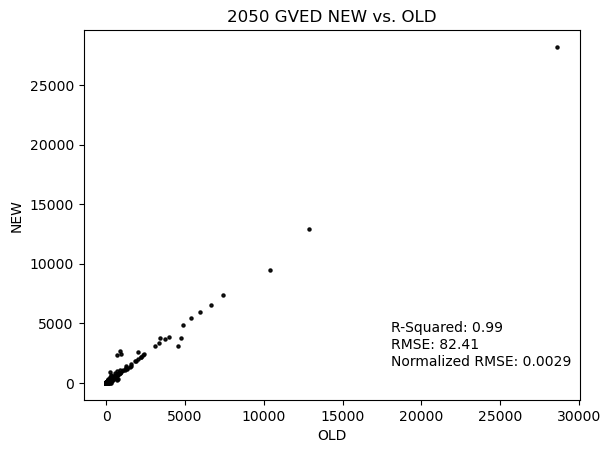

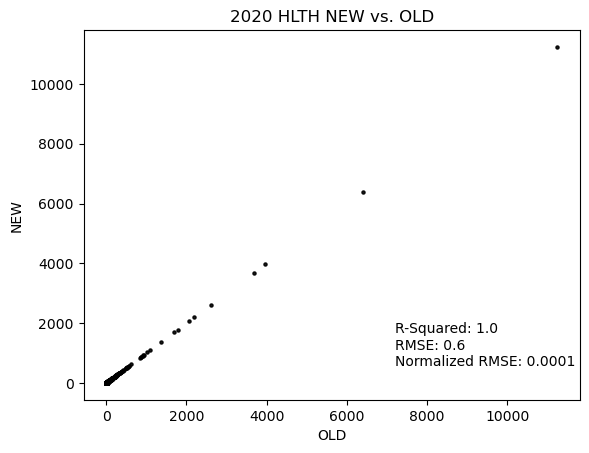

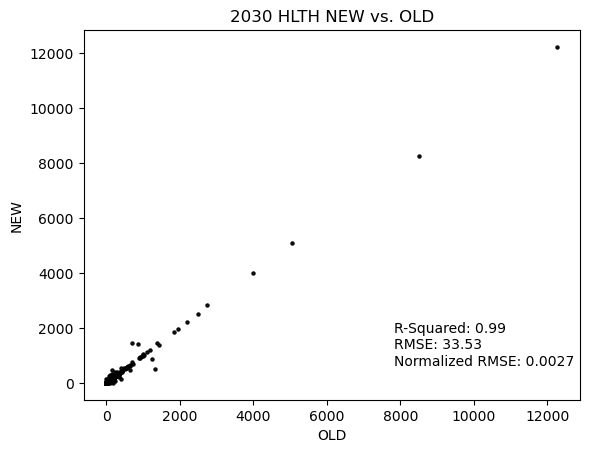

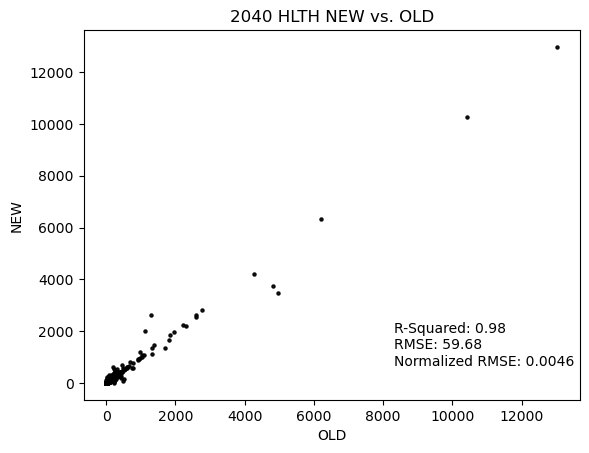

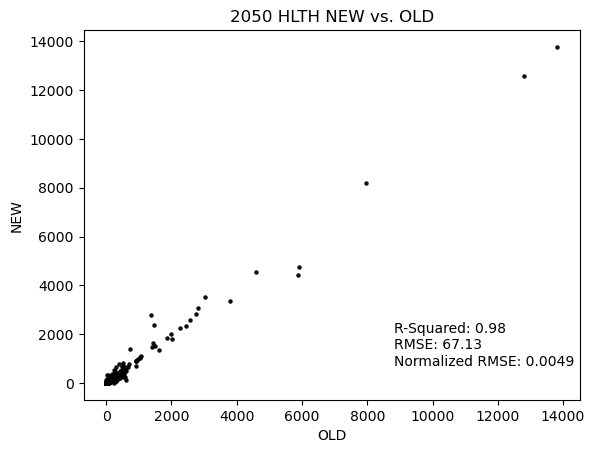

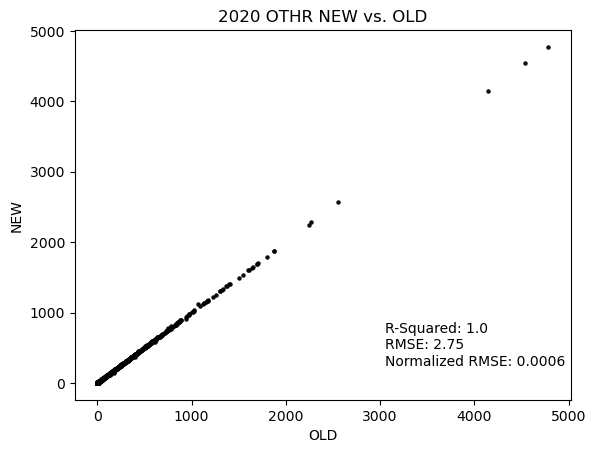

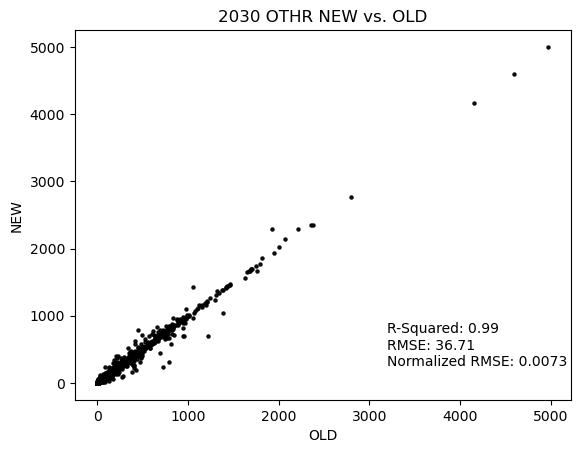

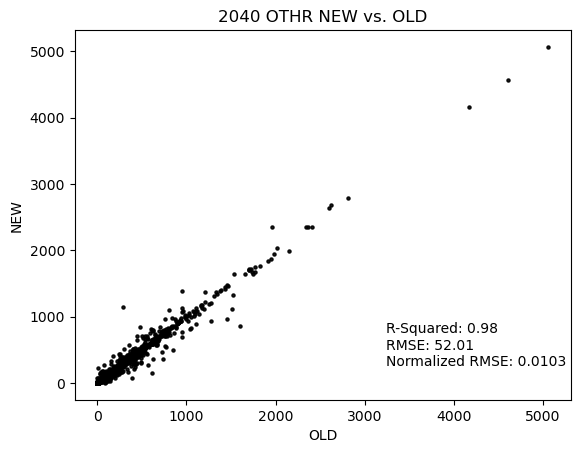

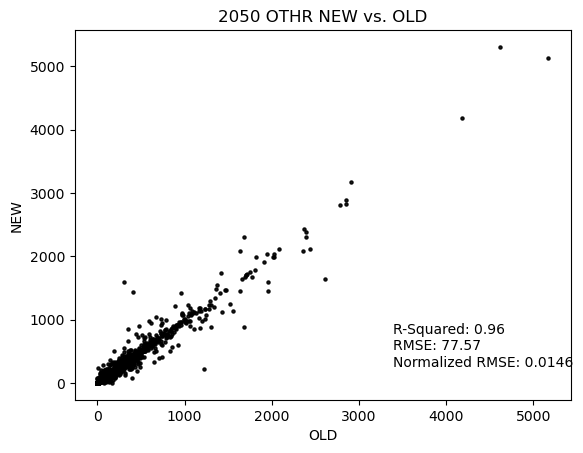

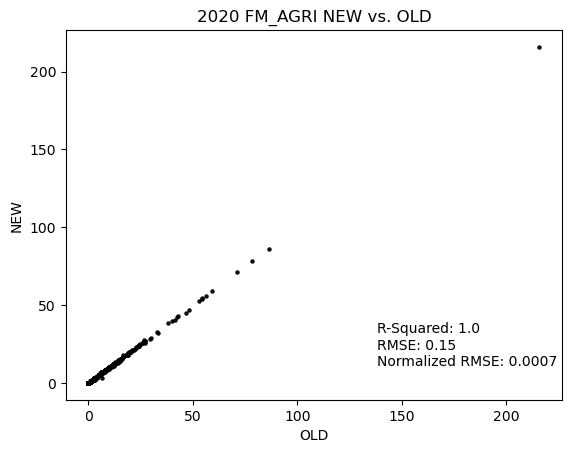

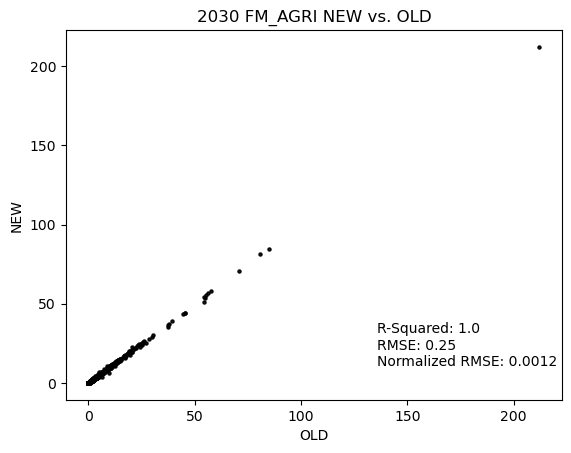

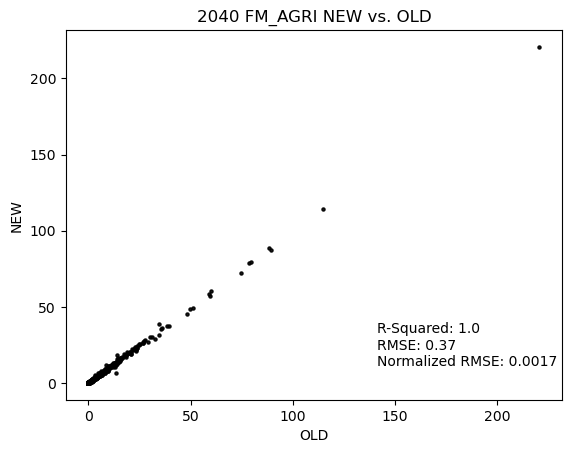

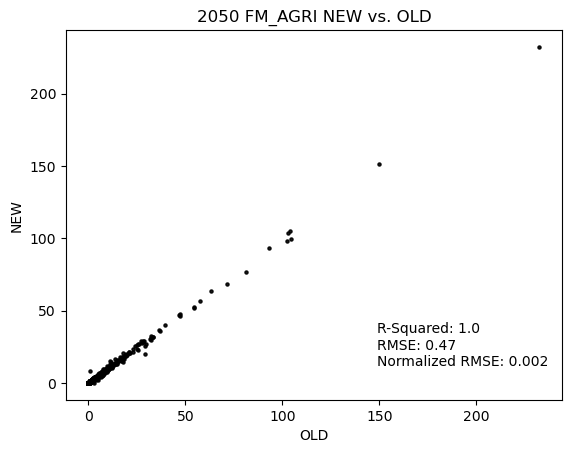

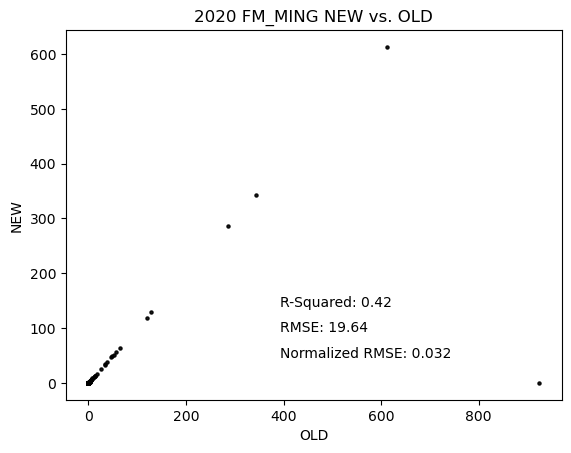

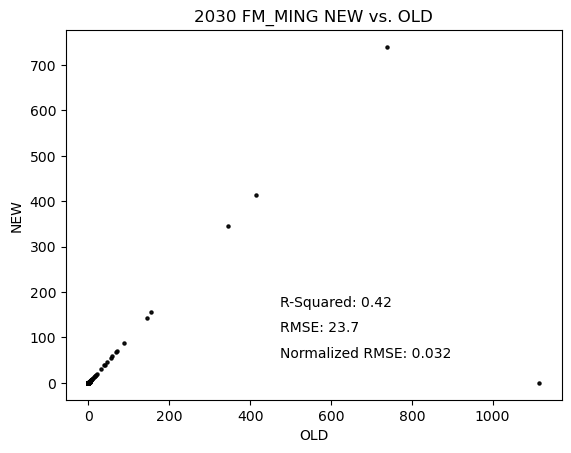

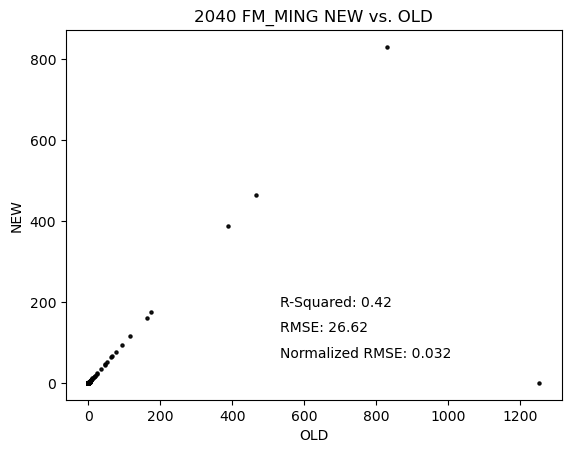

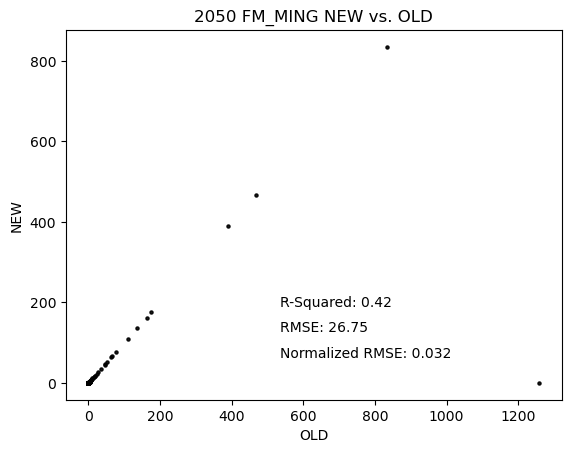

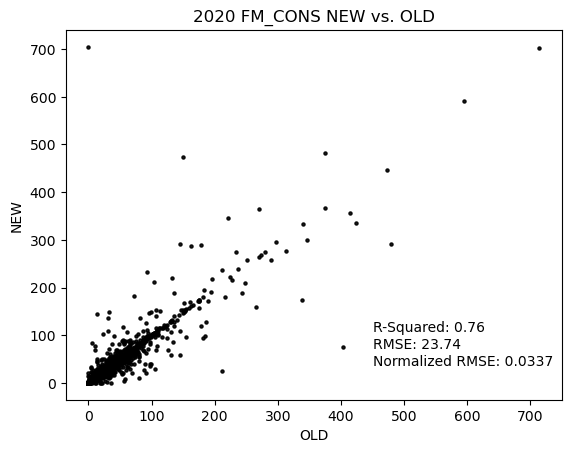

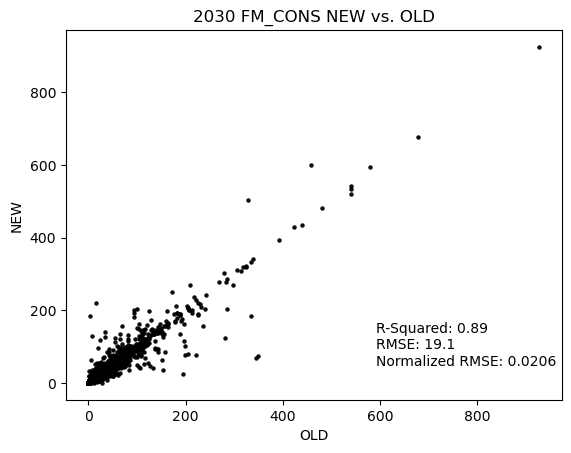

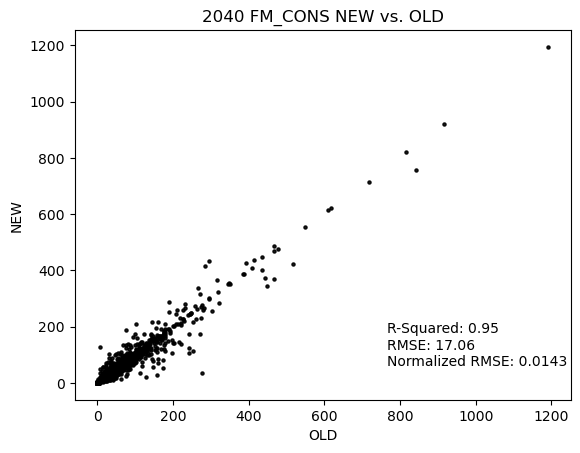

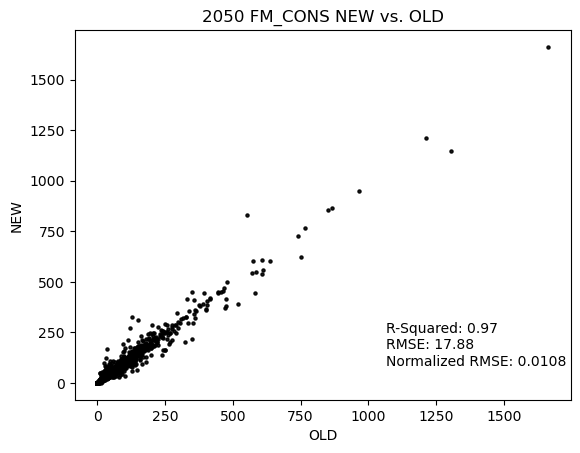

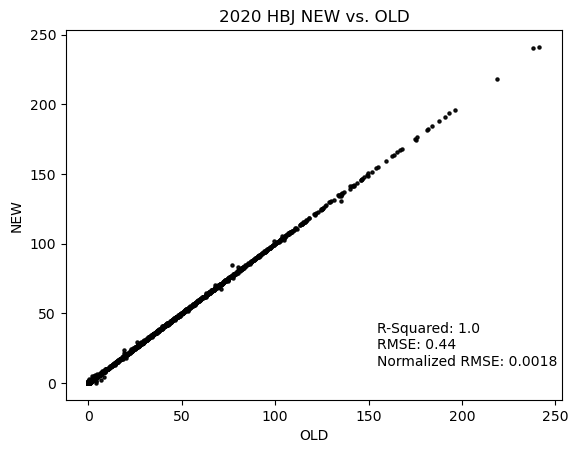

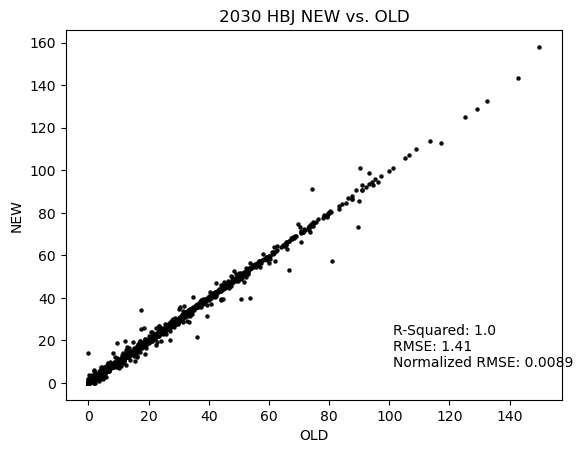

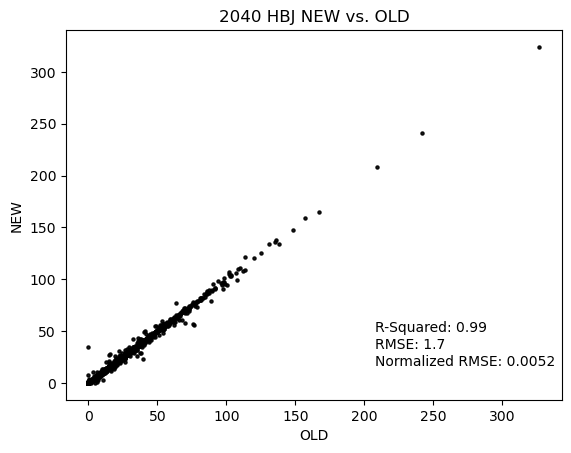

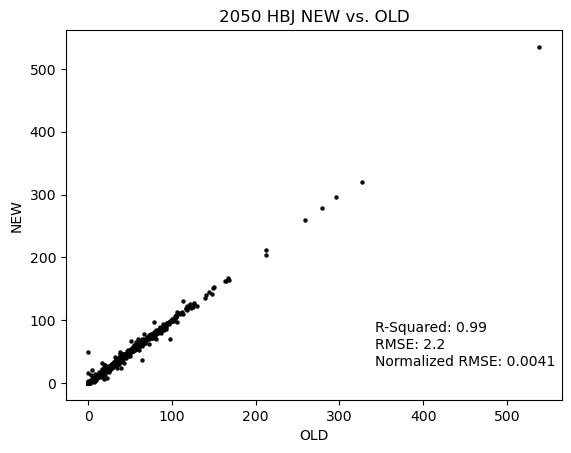

In [5]:
for var in vars:
    for year in years:
        # get se files for year
        new_se = pd.read_csv(os.path.join(new_folder, f'se_{year}.csv'), index_col=';TAZID')
        old_se = pd.read_csv(os.path.join(old_folder, f'se_{year}.csv'), index_col=';TAZID')

        if wfrc_only == True:
            min_tazid_900 = 2217
            new_se = new_se[(new_se.index < min_tazid_900)]
            old_se = old_se[(old_se.index < min_tazid_900)]

        # drop irrelevant columns
        new_se = new_se[vars].copy()
        old_se = old_se[vars].copy()

        # rename data cols to have new or old
        new_names = [v + '_NEW' for v in vars]
        old_names = [v + '_OLD' for v in vars]

        new_se.columns = new_names
        old_se.columns = old_names

        # join matching se together
        merged = new_se.merge(old_se, left_index=True,right_index=True, how='inner' )

        # coefficients
        r2 = r2_score(merged[f'{var}_NEW'], merged[f'{var}_OLD'])
        rmse = mean_squared_error(merged[f'{var}_NEW'], merged[f'{var}_OLD'], squared = False)

        nrmse = rmse/(merged[f'{var}_OLD'].max() - merged[f'{var}_OLD'].min()) 

        plt.scatter(merged[f'{var}_NEW'], merged[f'{var}_OLD'], s=5, c="k", alpha=0.9)
        plt.title(f'{year} {var} NEW vs. OLD')
        plt.xlabel('OLD')
        plt.ylabel('NEW')
        plt.text(merged[f'{var}_OLD'].max()*.64, merged[f'{var}_NEW'].max()*.15, f'R-Squared: {round(r2,2)}')
        plt.text(merged[f'{var}_OLD'].max()*.64, merged[f'{var}_NEW'].max()*.05, f'Normalized RMSE: {round(nrmse,4)}')
        plt.text(merged[f'{var}_OLD'].max()*.64, merged[f'{var}_NEW'].max()*.10, f'RMSE: {round(rmse,2)}')
        plt.show()